In [1]:
import pandas as pd
import numpy as np

In [2]:
Job_info = 'GC-200779_R3'
shrimp_number = 'SN_0004'

# Importing the Data

In [6]:
df = pd.read_csv(r'C:\Users\adeni\OneDrive - KLX Energy\Overview Data\WT-200779run3\SN0004_CH1_1.txt', delimiter = ' ')

# Preprocessing and Cleaning the Data

In [7]:
df.head()

,Unnamed: 0,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*
0,NaN,12,61,191,199,128,134,20,0
1,NaN,12,59,192,198,5,4,21,0
2,NaN,12,58,192,199,4,3,21,0
3,NaN,12,61,192,199,5,4,21,0
4,NaN,12,60,192,199,5,3,21,0


In [8]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [9]:
#df.drop(columns = ['Date'], inplace=True)

In [10]:
#df.drop(columns = ['Time'], inplace=True)

In [11]:
df.drop(df[df['TEMP'] > 254].index, inplace = True)

In [12]:
df

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*
0,12,61,191,199,128,134,20,0
1,12,59,192,198,5,4,21,0
2,12,58,192,199,4,3,21,0
3,12,61,192,199,5,4,21,0
4,12,60,192,199,5,3,21,0
...,...,...,...,...,...,...,...,...
945410,0,0,0,5,1,1,20,0
945411,0,0,0,0,1,1,20,0
945412,0,0,0,0,1,1,20,0
945413,0,0,0,2,1,1,20,0


In [13]:
df.describe()

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*
count,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000
mean,10.603214,103.737641,166.888386,184.931606,14.331803,21.495562,98.544378,0.007112
std,1.271479,64.454294,21.856594,14.237218,7.173724,11.844663,28.487763,0.771346
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,18.000000,0.000000
25%,10.000000,63.000000,148.000000,172.000000,7.000000,12.000000,91.000000,0.000000
50%,10.000000,77.000000,157.000000,181.000000,15.000000,24.000000,108.000000,0.000000
75%,12.000000,147.000000,192.000000,200.000000,20.000000,29.000000,119.000000,0.000000
max,140.000000,255.000000,240.000000,255.000000,129.000000,135.000000,156.000000,128.000000


In [14]:
df.drop(df[df['MROAVG'] > 254].index, inplace = True)

In [15]:
#df.drop(df[df['LROAVG'] > 254].index, inplace = True)

In [16]:
#df.drop(df[df['LROAVG'] > 254].index, inplace = True)

In [17]:
df.describe()

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*
count,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000
mean,10.603214,103.737641,166.888386,184.931606,14.331803,21.495562,98.544378,0.007112
std,1.271479,64.454294,21.856594,14.237218,7.173724,11.844663,28.487763,0.771346
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,18.000000,0.000000
25%,10.000000,63.000000,148.000000,172.000000,7.000000,12.000000,91.000000,0.000000
50%,10.000000,77.000000,157.000000,181.000000,15.000000,24.000000,108.000000,0.000000
75%,12.000000,147.000000,192.000000,200.000000,20.000000,29.000000,119.000000,0.000000
max,140.000000,255.000000,240.000000,255.000000,129.000000,135.000000,156.000000,128.000000


In [18]:
df.loc[df['LROAVG'] == 255].count

<bound method DataFrame.count of         MROAVG  LROAVG  ROMIN  ROMAX  ZRANGE  YRANGE  TEMP  *
2436        12     255    191    231       5       7    28  0
117455      10     255    161    186      23      28    79  0
117467      10     255    144    191      17      22    79  0
117490      10     255    165    187      15      17    79  0
117547      10     255    167    188      16      27    79  0
...        ...     ...    ...    ...     ...     ...   ... ..
850856       9     255    153    171      15      40   122  0
850923       9     255    153    171      13      55   122  0
853627       9     255    149    178      27      74   122  0
853931       9     255    154    175       9      43   122  0
909270      11     255    182    200       4       5    53  0

[2332 rows x 8 columns]>

In [19]:
df['BHA-RPM'] = ((3117 - ((256 * df['MROAVG']) + df['LROAVG']))/ 7.305)

In [20]:
df['Z-Gs'] = df['ZRANGE'] / 7.75

In [21]:
df['XY-Gs'] = df['YRANGE']/7.75

In [22]:
df['BHA-RPM'].mean()

40.90890648803966

In [23]:
df

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs
0,12,61,191,199,128,134,20,0,-2.190281,16.516129,17.290323
1,12,59,192,198,5,4,21,0,-1.916496,0.645161,0.516129
2,12,58,192,199,4,3,21,0,-1.779603,0.516129,0.387097
3,12,61,192,199,5,4,21,0,-2.190281,0.645161,0.516129
4,12,60,192,199,5,3,21,0,-2.053388,0.645161,0.387097
...,...,...,...,...,...,...,...,...,...,...,...
945410,0,0,0,5,1,1,20,0,426.694045,0.129032,0.129032
945411,0,0,0,0,1,1,20,0,426.694045,0.129032,0.129032
945412,0,0,0,0,1,1,20,0,426.694045,0.129032,0.129032
945413,0,0,0,2,1,1,20,0,426.694045,0.129032,0.129032


In [24]:
df['BHA-RPM'].mode()

0   -4.243669
dtype: float64

In [25]:
df.describe()

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs
count,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000,945162.000000
mean,10.603214,103.737641,166.888386,184.931606,14.331803,21.495562,98.544378,0.007112,40.908906,1.849265,2.773621
std,1.271479,64.454294,21.856594,14.237218,7.173724,11.844663,28.487763,0.771346,40.285251,0.925642,1.528344
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,18.000000,0.000000,-4488.569473,0.129032,0.129032
25%,10.000000,63.000000,148.000000,172.000000,7.000000,12.000000,91.000000,0.000000,-3.148528,0.903226,1.548387
50%,10.000000,77.000000,157.000000,181.000000,15.000000,24.000000,108.000000,0.000000,55.167693,1.935484,3.096774
75%,12.000000,147.000000,192.000000,200.000000,20.000000,29.000000,119.000000,0.000000,75.427789,2.580645,3.741935
max,140.000000,255.000000,240.000000,255.000000,129.000000,135.000000,156.000000,128.000000,426.694045,16.645161,17.419355


In [26]:

i = pd.date_range('2018-04-09 10:00:00.5', periods=945162 , freq='500L')
df['Datetime'] = i


In [27]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [28]:
df

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs,Datetime
0,12,61,191,199,128,134,20,0,-2.190281,16.516129,17.290323,2018-04-09 10:00:00.500
1,12,59,192,198,5,4,21,0,-1.916496,0.645161,0.516129,2018-04-09 10:00:01.000
2,12,58,192,199,4,3,21,0,-1.779603,0.516129,0.387097,2018-04-09 10:00:01.500
3,12,61,192,199,5,4,21,0,-2.190281,0.645161,0.516129,2018-04-09 10:00:02.000
4,12,60,192,199,5,3,21,0,-2.053388,0.645161,0.387097,2018-04-09 10:00:02.500
...,...,...,...,...,...,...,...,...,...,...,...,...
945410,0,0,0,5,1,1,20,0,426.694045,0.129032,0.129032,2018-04-14 21:16:19.000
945411,0,0,0,0,1,1,20,0,426.694045,0.129032,0.129032,2018-04-14 21:16:19.500
945412,0,0,0,0,1,1,20,0,426.694045,0.129032,0.129032,2018-04-14 21:16:20.000
945413,0,0,0,2,1,1,20,0,426.694045,0.129032,0.129032,2018-04-14 21:16:20.500


In [29]:
#df2 = df.loc[df['Datetime'] > '2018-04-09 12:59:03', "BHA-RPM"]
#df_temp = df.loc[df['Datetime'] > '2018-04-09 12:59:03', "TEMP"]

In [30]:
#df_temp

# EDA (Exploratory Data Analysis) 

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

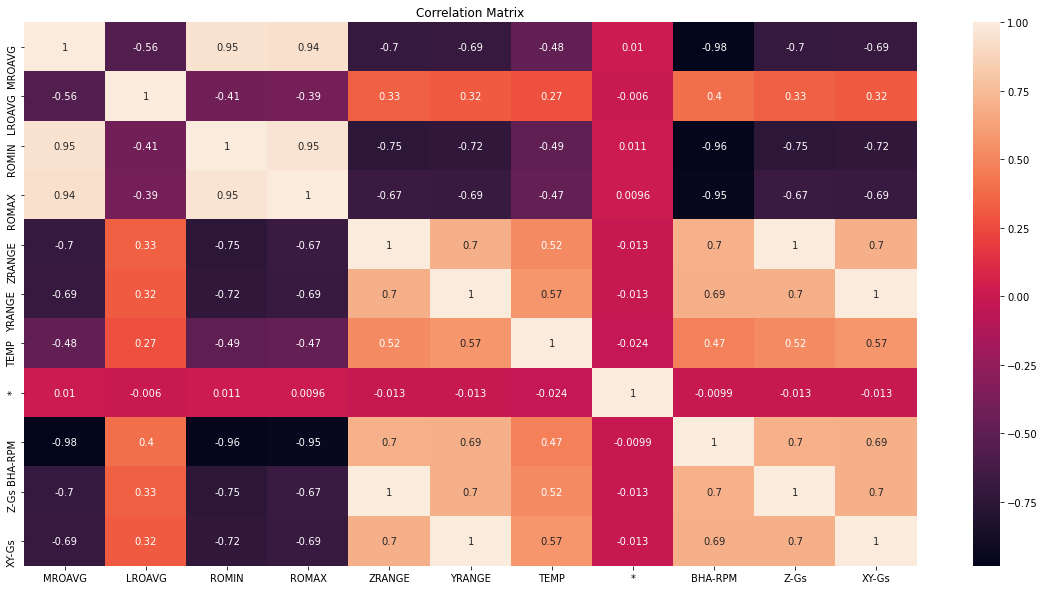

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

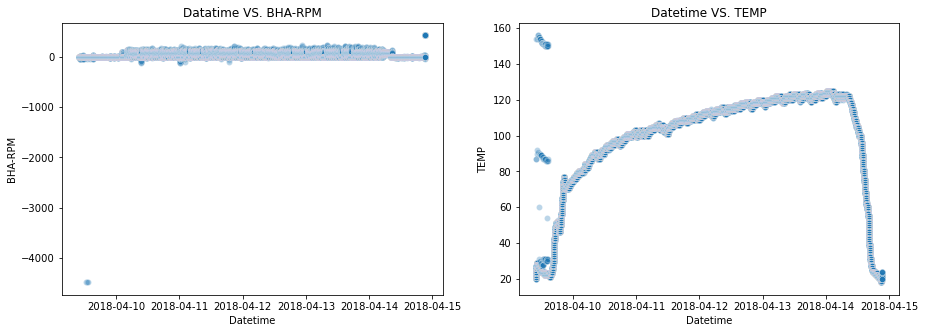

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['BHA-RPM'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datatime VS. BHA-RPM')

sns.scatterplot(x='Datetime', y='TEMP', data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. TEMP')

plt.show()

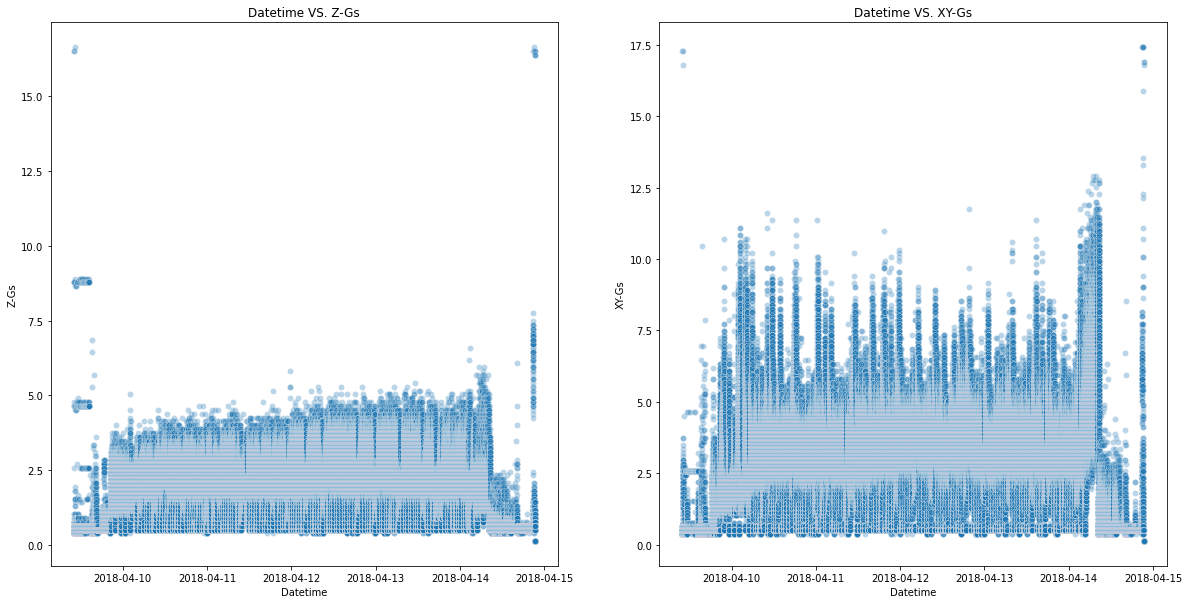

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['Z-Gs'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. Z-Gs')

sns.scatterplot(x='Datetime', y=df['XY-Gs'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. XY-Gs')

plt.show()

In [35]:
#df.drop(df.loc[df['Datetime'] < '2018-04-09 15:59:03', "BHA-RPM"].index, inplace = True)

In [36]:
#df.drop(df.loc[df['BHA-RPM']  > -420, 'BHA-RPM'].index, inplace = True)

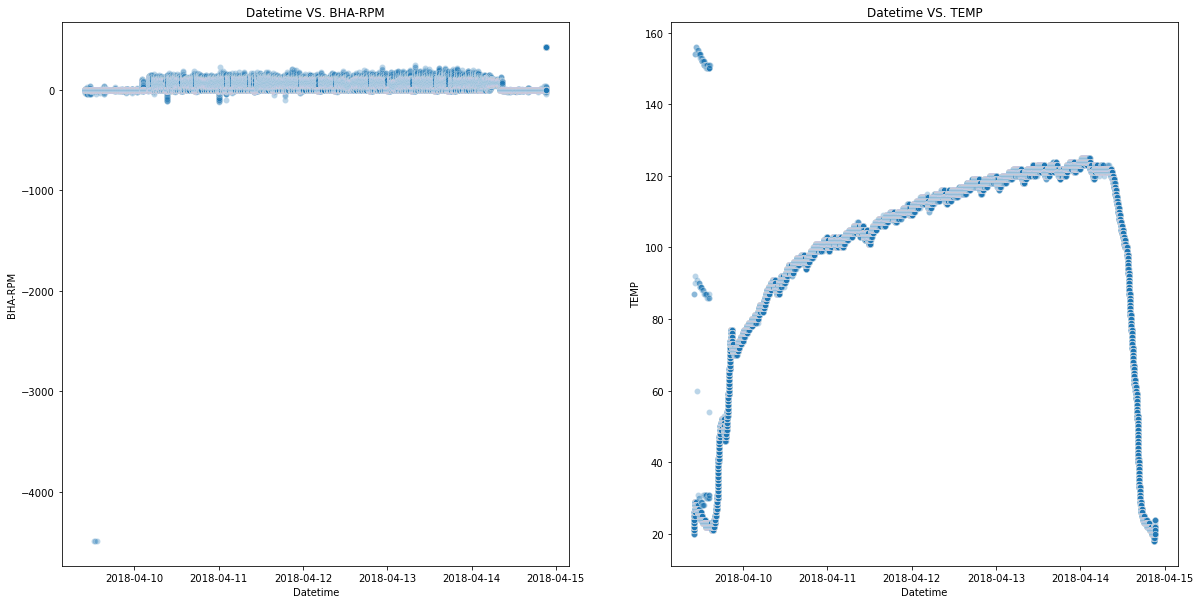

In [37]:
df.drop(df.loc[df['BHA-RPM']  > 501, 'BHA-RPM'].index, inplace = True)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['BHA-RPM'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. BHA-RPM')

sns.scatterplot(x='Datetime', y=df['TEMP'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. TEMP')

plt.show()

In [38]:
df.drop(df.loc[df['BHA-RPM']  < -250 , 'BHA-RPM'].index, inplace = True)

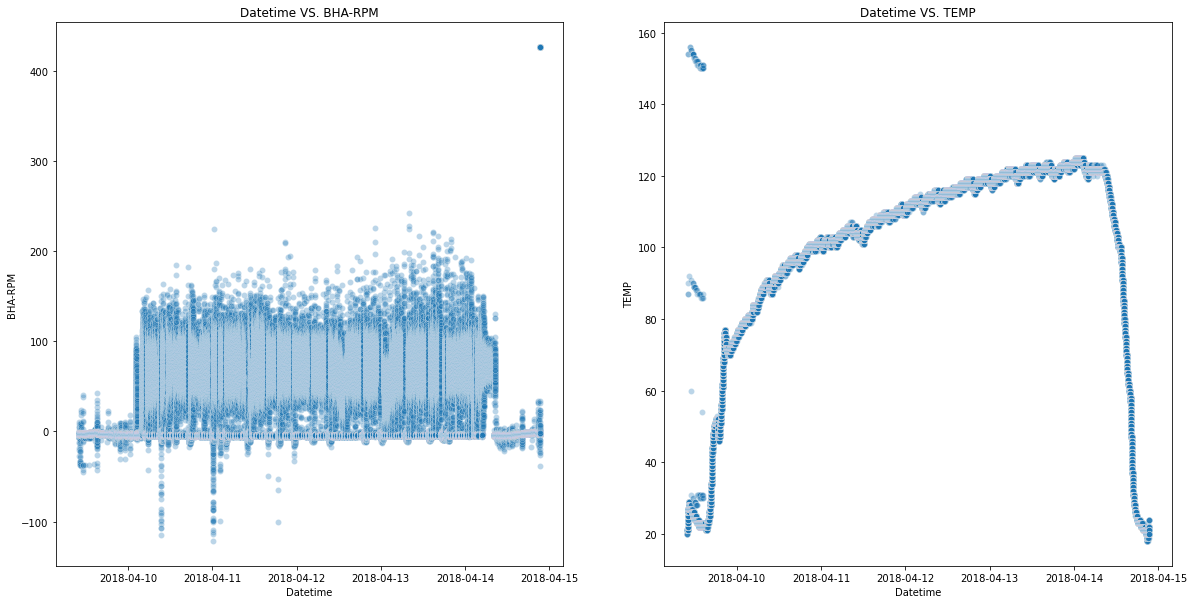

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['BHA-RPM'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. BHA-RPM')

sns.scatterplot(x='Datetime', y=df['TEMP'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. TEMP')

plt.show()

In [40]:
#df.drop(df[df['TEMP'] > 100 ].index, inplace = True)

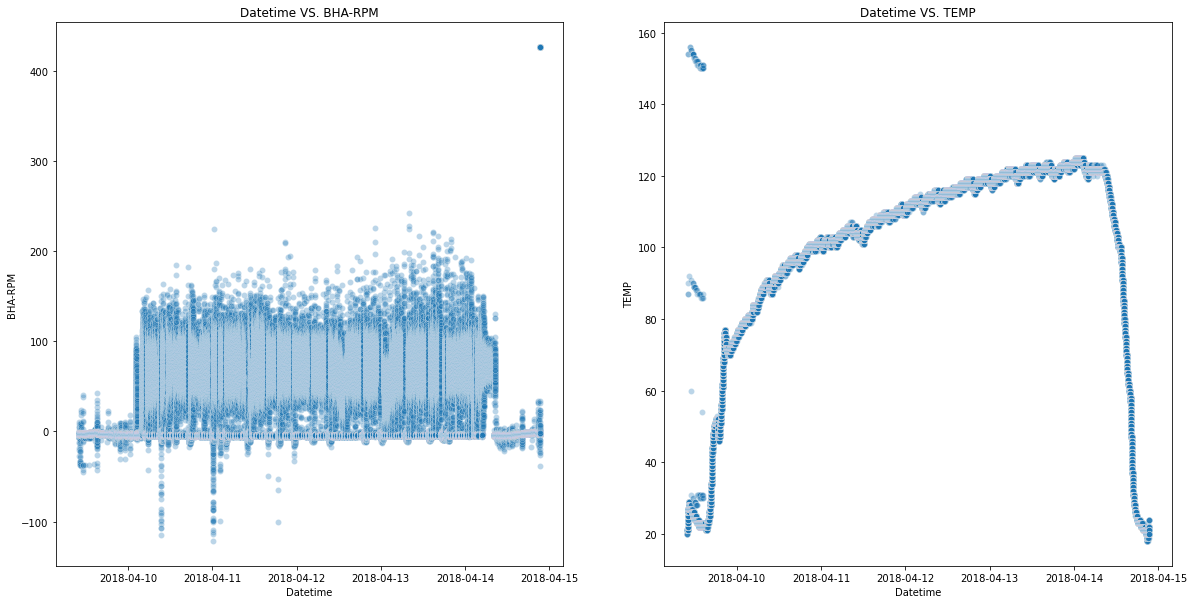

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['BHA-RPM'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. BHA-RPM')

sns.scatterplot(x='Datetime', y=df['TEMP'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. TEMP')

plt.show()

# Shock and Vibration 
### Drop the first hour or so of the remove the Noise

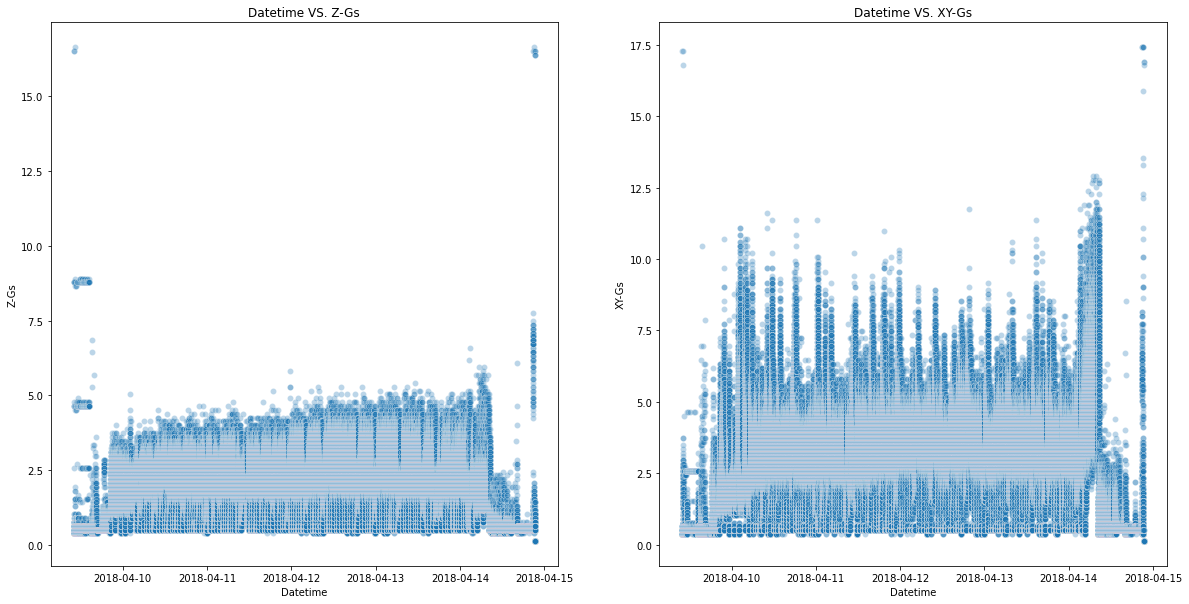

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['Z-Gs'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. Z-Gs')

sns.scatterplot(x='Datetime', y=df['XY-Gs'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. XY-Gs')

plt.show()

In [43]:
df.drop(df[df['Z-Gs'] > 21 ].index, inplace = True)

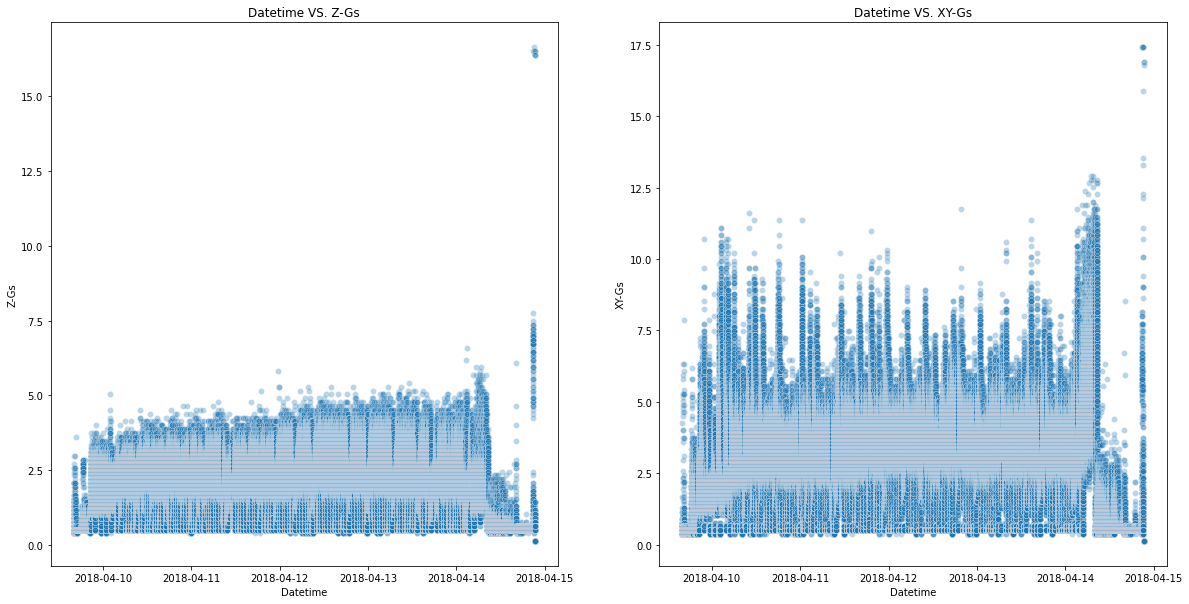

In [44]:
df.drop(df.loc[df['Datetime'] < '2018-04-09 15:59:03', "Z-Gs"].index, inplace = True)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['Z-Gs'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. Z-Gs')

sns.scatterplot(x='Datetime', y=df['XY-Gs'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. XY-Gs')

plt.show()

In [45]:
df.drop(df.loc[df['BHA-RPM']  >425.694045 , 'BHA-RPM'].index, inplace = True)

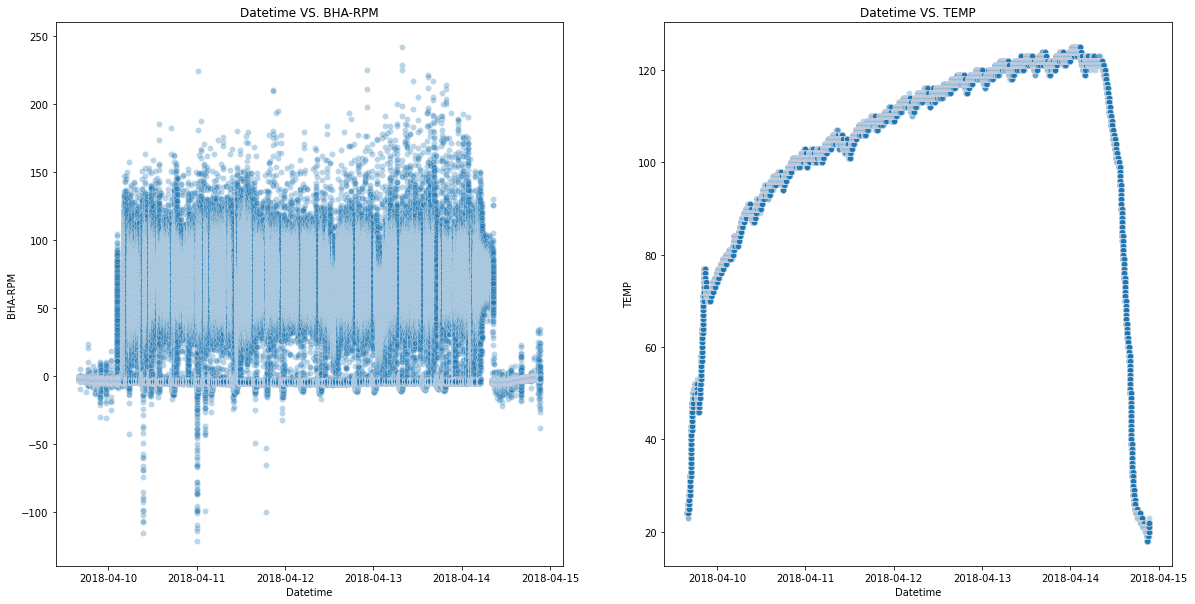

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['BHA-RPM'], data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Datetime VS. BHA-RPM')

sns.scatterplot(x='Datetime', y=df['TEMP'], data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Datetime VS. TEMP')

plt.show()

In [47]:
df

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs,Datetime
43145,12,56,192,199,4,4,24,0,-1.505818,0.516129,0.516129,2018-04-09 15:59:03.000
43146,12,56,192,200,5,3,24,0,-1.505818,0.645161,0.387097,2018-04-09 15:59:03.500
43147,12,62,192,199,3,3,24,0,-2.327173,0.387097,0.387097,2018-04-09 15:59:04.000
43148,12,59,192,200,5,3,24,0,-1.916496,0.645161,0.387097,2018-04-09 15:59:04.500
43149,12,56,191,200,5,4,24,0,-1.505818,0.645161,0.516129,2018-04-09 15:59:05.000
...,...,...,...,...,...,...,...,...,...,...,...,...
945317,12,55,192,199,5,4,22,0,-1.368925,0.645161,0.516129,2018-04-14 21:16:02.000
945318,12,56,192,199,5,4,22,0,-1.505818,0.645161,0.516129,2018-04-14 21:16:02.500
945319,12,62,192,199,5,4,22,0,-2.327173,0.645161,0.516129,2018-04-14 21:16:03.000
945320,12,61,192,199,5,4,22,0,-2.190281,0.645161,0.516129,2018-04-14 21:16:03.500


### How many Z-Gs is over 12

In [48]:
Z_Gs_over_12 = (df['Z-Gs'].values > 12).sum()
Z_Gs_over_20 = (df['Z-Gs'].values > 20).sum()
Z_Gs_over_30 = (df['Z-Gs'].values > 30).sum()
Z_Gs_over_40 = (df['Z-Gs'].values > 40).sum()

print(Z_Gs_over_12)
print(Z_Gs_over_20)
print(Z_Gs_over_30)
print(Z_Gs_over_40)

5
0
0
0


### How many XY-Gs is over 12

In [49]:
XY_Gs_over_12 =(df['XY-Gs'].values > 12).sum()
XY_Gs_over_20 =(df['XY-Gs'].values > 20).sum()
XY_Gs_over_30 =(df['XY-Gs'].values > 30).sum()
XY_Gs_over_40 =(df['XY-Gs'].values > 40).sum()

print(XY_Gs_over_12)
print(XY_Gs_over_20)
print(XY_Gs_over_30)
print(XY_Gs_over_40)

22
0
0
0


# BHA-RPM positive and negative values counts 

### BHA-RPM over 200

In [50]:
(df['BHA-RPM'].values > 200).sum()

22

### BHA-RPM less 200 (include Negatives)

In [51]:
(df['BHA-RPM'].values <= 200).sum()

902021

### BHA-RPM less than Negative 10

In [52]:
RPM_less_than_Negative_10 = (df['BHA-RPM'].values <= -10).sum()
print('Number of RPM_less_than_Negative_10: ', RPM_less_than_Negative_10)

Number of RPM_less_than_Negative_10:  820


### BHA-RPM less than Negative 100

In [53]:
RPM_less_than_Negative_100 = (df['BHA-RPM'].values <= -100).sum()
print('Number of RPM_less_than_Negative_100: ', RPM_less_than_Negative_100)

Number of RPM_less_than_Negative_100:  10


In [54]:
RPM_over_200 =(df['BHA-RPM'].values > 200).sum()
RPM_over_300 =(df['BHA-RPM'].values > 300).sum()
RPM_over_400 =(df['BHA-RPM'].values > 400).sum()

In [55]:
print('Number of RPM_over_200:', RPM_over_200)
print('Number of RPM_over_300:', RPM_over_300)
print('Number of RPM_over_400:', RPM_over_400)

Number of RPM_over_200: 22
Number of RPM_over_300: 0
Number of RPM_over_400: 0


Text(0.5, 1.0, 'Datetime VS. BHA-RPM')

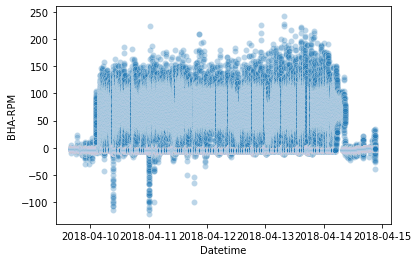

In [56]:
# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x= df['Datetime'], y= df['BHA-RPM'], data=df, alpha=0.3)
axes[0].set_title('Datetime VS. BHA-RPM')

In [57]:
percent_of_RPM_over_200 = RPM_over_200/(df['BHA-RPM'].values < 200).sum()*100
print('Percent of percent_of_RPM_over_200: ', percent_of_RPM_over_200)

Percent of percent_of_RPM_over_200:  0.0024389676071843117


# How many percent of BHA-RPM is more than 200

In [58]:
print(percent_of_RPM_over_200)
print(RPM_over_200)

0.0024389676071843117
22


In [59]:
"""yerror = 
plt.errorbar( df['BHA-RPM'].index, df['BHA-RPM'], yerr=yerror, fmt='o')"""

"yerror = \nplt.errorbar( df['BHA-RPM'].index, df['BHA-RPM'], yerr=yerror, fmt='o')"

In [60]:
temp_mean = df["TEMP"].mean()
temp_max = df['TEMP'].max()
temp_min = df['TEMP'].min()
temp_std = df['TEMP'].std()

In [61]:
BHA_RPM_mean = df['BHA-RPM'].mean()
BHA_RPM_max = df['BHA-RPM'].max()
BHA_RPM_min = df['BHA-RPM'].min()
BHA_RPM_std = df['BHA-RPM'].std()

In [62]:
Z_Gs_mean = df['Z-Gs'].mean()
Z_Gs_max = df['Z-Gs'].max()
Z_Gs_min = df['Z-Gs'].min()
Z_Gs_std = df['Z-Gs'].std()

In [63]:
XY_Gs_mean = df['XY-Gs'].mean()
XY_Gs_max = df['XY-Gs'].max()
XY_Gs_min = df['XY-Gs'].min()
XY_Gs_std = df['XY-Gs'].std()

In [64]:
df.describe()

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs
count,902043.000000,902043.000000,902043.000000,902043.000000,902043.000000,902043.000000,902043.000000,902043.0,902043.000000,902043.000000,902043.000000
mean,10.536491,105.779650,165.703382,184.233962,14.805352,22.322012,102.093473,0.0,42.967644,1.910368,2.880260
std,1.239503,65.259808,21.641320,14.149159,6.953848,11.477385,23.929885,0.0,39.161650,0.897271,1.480953
min,5.000000,0.000000,60.000000,98.000000,3.000000,3.000000,18.000000,0.0,-121.697467,0.387097,0.387097
25%,10.000000,65.000000,147.000000,172.000000,9.000000,14.000000,96.000000,0.0,-3.285421,1.161290,1.806452
50%,10.000000,79.000000,156.000000,180.000000,16.000000,25.000000,109.000000,0.0,57.905544,2.064516,3.225806
75%,12.000000,152.000000,192.000000,200.000000,20.000000,29.000000,119.000000,0.0,76.112252,2.580645,3.741935
max,15.000000,255.000000,240.000000,255.000000,129.000000,135.000000,125.000000,0.0,241.889117,16.645161,17.419355


In [65]:
df

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs,Datetime
43145,12,56,192,199,4,4,24,0,-1.505818,0.516129,0.516129,2018-04-09 15:59:03.000
43146,12,56,192,200,5,3,24,0,-1.505818,0.645161,0.387097,2018-04-09 15:59:03.500
43147,12,62,192,199,3,3,24,0,-2.327173,0.387097,0.387097,2018-04-09 15:59:04.000
43148,12,59,192,200,5,3,24,0,-1.916496,0.645161,0.387097,2018-04-09 15:59:04.500
43149,12,56,191,200,5,4,24,0,-1.505818,0.645161,0.516129,2018-04-09 15:59:05.000
...,...,...,...,...,...,...,...,...,...,...,...,...
945317,12,55,192,199,5,4,22,0,-1.368925,0.645161,0.516129,2018-04-14 21:16:02.000
945318,12,56,192,199,5,4,22,0,-1.505818,0.645161,0.516129,2018-04-14 21:16:02.500
945319,12,62,192,199,5,4,22,0,-2.327173,0.645161,0.516129,2018-04-14 21:16:03.000
945320,12,61,192,199,5,4,22,0,-2.190281,0.645161,0.516129,2018-04-14 21:16:03.500


In [66]:
df.reset_index(drop = True, inplace = True)

In [67]:
df

,MROAVG,LROAVG,ROMIN,ROMAX,ZRANGE,YRANGE,TEMP,*,BHA-RPM,Z-Gs,XY-Gs,Datetime
0,12,56,192,199,4,4,24,0,-1.505818,0.516129,0.516129,2018-04-09 15:59:03.000
1,12,56,192,200,5,3,24,0,-1.505818,0.645161,0.387097,2018-04-09 15:59:03.500
2,12,62,192,199,3,3,24,0,-2.327173,0.387097,0.387097,2018-04-09 15:59:04.000
3,12,59,192,200,5,3,24,0,-1.916496,0.645161,0.387097,2018-04-09 15:59:04.500
4,12,56,191,200,5,4,24,0,-1.505818,0.645161,0.516129,2018-04-09 15:59:05.000
...,...,...,...,...,...,...,...,...,...,...,...,...
902038,12,55,192,199,5,4,22,0,-1.368925,0.645161,0.516129,2018-04-14 21:16:02.000
902039,12,56,192,199,5,4,22,0,-1.505818,0.645161,0.516129,2018-04-14 21:16:02.500
902040,12,62,192,199,5,4,22,0,-2.327173,0.645161,0.516129,2018-04-14 21:16:03.000
902041,12,61,192,199,5,4,22,0,-2.190281,0.645161,0.516129,2018-04-14 21:16:03.500


In [68]:
#df.to_excel(r'SN_0012.xlsx', index = False)

In [69]:
from csv import writer

def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

In [70]:
# List of strings
row_contents = [Job_info, shrimp_number, BHA_RPM_mean, BHA_RPM_max, BHA_RPM_min, BHA_RPM_std, RPM_over_200, RPM_over_300, RPM_over_400, percent_of_RPM_over_200, RPM_less_than_Negative_10, RPM_less_than_Negative_100,
                temp_mean, temp_max, temp_std, 
                Z_Gs_mean, Z_Gs_max, Z_Gs_std, Z_Gs_over_12, Z_Gs_over_20, Z_Gs_over_30, Z_Gs_over_40, 
                XY_Gs_mean, XY_Gs_max, XY_Gs_std, XY_Gs_over_12, XY_Gs_over_20, XY_Gs_over_30, XY_Gs_over_40]
# Append a list as new line to an old csv file
append_list_as_row('SHRIMP Report.csv', row_contents)